In [3]:
import json
import pandas as pd
import numpy as np


In [4]:
business_list = []
with open('business.json', 'r') as f:
    for cnt, line in enumerate(f):
        try:
            line = line.strip('\n').strip(',')
#            json_obj = json.loads(line)
            business_list.append(json.loads(line))
        except Exception as e:
            print(e)
            continue
business = pd.DataFrame(business_list)

In [5]:
len(business)#total length 

192609

In [6]:
business = business[(business['categories'].isnull() ==False)&(business['is_open']==1)&(business['review_count']>10)]
len(business)

72677

In [7]:
ice= business[business['categories'].str.contains('Ice Cream')]
len(ice)


1294

In [8]:
ice = ice[(ice['city']=='Pittsburgh')|(ice['city']=='Charlotte')|
                    (ice['city']=='Urbana')|(ice['city']=='Phoenix')|(ice['city']=='Las Vegas')|
                    (ice['city']=='Madison')|(ice['city']=='Cleveland')]
len(ice)


455

In [9]:
ice.groupby('city').size()

city
Charlotte      57
Cleveland      24
Las Vegas     173
Madison        28
Phoenix       118
Pittsburgh     51
Urbana          4
dtype: int64

In [10]:
from os import path 
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt


text = ' '.join(ice['categories']) 

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
ice.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
411,7800 Fairview Rd,"{'WiFi': ''no'', 'BusinessAcceptsCreditCards':...",nwxF9EKLOCpkScMF2utHDw,"Ice Cream & Frozen Yogurt, Food, Event Plannin...",Charlotte,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1,35.147358,-80.809568,Ben & Jerry's,28226,19,3.5,NC
460,115 Meyran Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",O-fYUqXjkwNvRfFnlUH6Iw,"Bakeries, Event Planning & Services, Caterers,...",Pittsburgh,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,40.440959,-79.958608,Insomnia Cookies,15213,18,3.0,PA
1807,2362 Professor Ave,"{'BusinessParking': '{'garage': False, 'street...",GhOWffUr9yDBxB5Ceqzc_Q,"Food, Ice Cream & Frozen Yogurt",Cleveland,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,41.480032,-81.685488,Tremont Scoops,44113,89,4.0,OH
1897,10965 Lavender Hill Dr,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Busi...",I8T4Xsp3Wv7W-RJhsHrTDA,"Ice Cream & Frozen Yogurt, Food",Las Vegas,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,36.144869,-115.333094,Menchie's Frozen Yogurt,89135,49,3.5,NV
1969,4845 S Fort Apache Rd,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...",iX2c4IzH_L5F6FM5GD3SUQ,"Restaurants, Desserts, Food, Juice Bars & Smoo...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.101690,-115.298150,Tasty Crepes,89147,260,4.5,NV


In [12]:
ice = ice[(ice['attributes'].isnull() ==False)]
len(ice)

453

In [13]:
a=ice['attributes'].to_list()
b=[]
for i in range(453):
    c=list(a[i].keys())
    b=b+c



In [18]:
import collections
collections.Counter(b)

Counter({'WiFi': 426,
         'BusinessAcceptsCreditCards': 451,
         'RestaurantsPriceRange2': 448,
         'BusinessParking': 445,
         'BikeParking': 435,
         'RestaurantsTakeOut': 442,
         'Caters': 365,
         'WheelchairAccessible': 127,
         'Alcohol': 167,
         'OutdoorSeating': 188,
         'RestaurantsAttire': 156,
         'Ambience': 152,
         'RestaurantsDelivery': 207,
         'HasTV': 152,
         'GoodForMeal': 133,
         'RestaurantsReservations': 162,
         'GoodForKids': 163,
         'NoiseLevel': 129,
         'RestaurantsGoodForGroups': 157,
         'BusinessAcceptsBitcoin': 78,
         'ByAppointmentOnly': 21,
         'RestaurantsTableService': 85,
         'DriveThru': 45,
         'DogsAllowed': 62,
         'GoodForDancing': 3,
         'BYOBCorkage': 5,
         'Smoking': 4,
         'HappyHour': 3,
         'CoatCheck': 2,
         'Music': 2,
         'BestNights': 2,
         'DietaryRestrictions': 1})

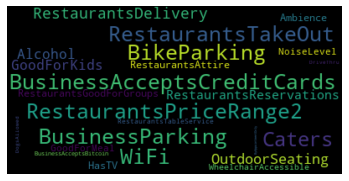

In [14]:
text = ' '.join(b) 

wordcloud3 = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
att_list=list(set(b))
len(att_list)|

['RestaurantsDelivery',
 'RestaurantsPriceRange2',
 'WiFi',
 'Ambience',
 'Music',
 'DogsAllowed',
 'BusinessAcceptsCreditCards',
 'GoodForDancing',
 'Smoking',
 'RestaurantsTableService',
 'GoodForMeal',
 'RestaurantsGoodForGroups',
 'WheelchairAccessible',
 'Caters',
 'RestaurantsAttire',
 'Alcohol',
 'RestaurantsReservations',
 'DriveThru',
 'GoodForKids',
 'BestNights',
 'BusinessAcceptsBitcoin',
 'HappyHour',
 'OutdoorSeating',
 'ByAppointmentOnly',
 'CoatCheck',
 'NoiseLevel',
 'BusinessParking',
 'HasTV',
 'DietaryRestrictions',
 'BikeParking',
 'RestaurantsTakeOut',
 'BYOBCorkage']

In [82]:
for j in range(32):
    v=[]
    for i in range(453):
        vv=a[i].get(att_list[j],'No info')
        v.append(vv)
    ice[att_list[j]]=v


In [83]:
ice.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,ByAppointmentOnly,CoatCheck,NoiseLevel,BusinessParking,HasTV,DietaryRestrictions,BikeParking,RestaurantsTakeOut,BYOBCorkage,garage
411,7800 Fairview Rd,"{'WiFi': ''no'', 'BusinessAcceptsCreditCards':...",nwxF9EKLOCpkScMF2utHDw,"Ice Cream & Frozen Yogurt, Food, Event Plannin...",Charlotte,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1,35.147358,-80.809568,Ben & Jerry's,...,No info,No info,No info,"{'garage': False, 'street': False, 'validated'...",No info,No info,True,True,No info,False
460,115 Meyran Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",O-fYUqXjkwNvRfFnlUH6Iw,"Bakeries, Event Planning & Services, Caterers,...",Pittsburgh,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,40.440959,-79.958608,Insomnia Cookies,...,No info,No info,No info,"{'garage': False, 'street': False, 'validated'...",No info,No info,True,True,No info,False
1807,2362 Professor Ave,"{'BusinessParking': '{'garage': False, 'street...",GhOWffUr9yDBxB5Ceqzc_Q,"Food, Ice Cream & Frozen Yogurt",Cleveland,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,41.480032,-81.685488,Tremont Scoops,...,No info,No info,No info,"{'garage': False, 'street': True, 'validated':...",No info,No info,True,True,No info,False
1897,10965 Lavender Hill Dr,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Busi...",I8T4Xsp3Wv7W-RJhsHrTDA,"Ice Cream & Frozen Yogurt, Food",Las Vegas,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,36.144869,-115.333094,Menchie's Frozen Yogurt,...,No info,No info,No info,"{'garage': False, 'street': False, 'validated'...",No info,No info,True,True,No info,False
1969,4845 S Fort Apache Rd,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...",iX2c4IzH_L5F6FM5GD3SUQ,"Restaurants, Desserts, Food, Juice Bars & Smoo...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.101690,-115.298150,Tasty Crepes,...,False,No info,u'quiet',"{'garage': False, 'street': False, 'validated'...",True,No info,True,True,No info,False


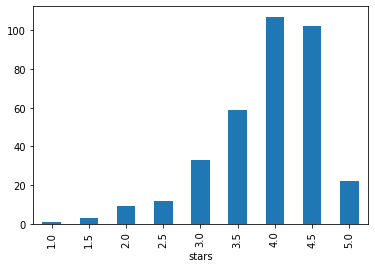

In [84]:
collections.Counter(ice['stars'])
ice.groupby('stars')['name'].nunique().plot(kind='bar')
plt.show()

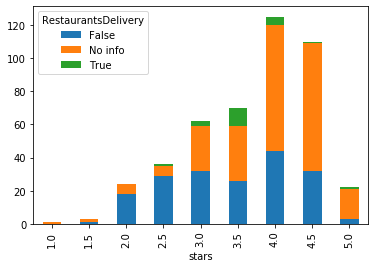

In [91]:
ice.groupby(['stars','RestaurantsDelivery']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

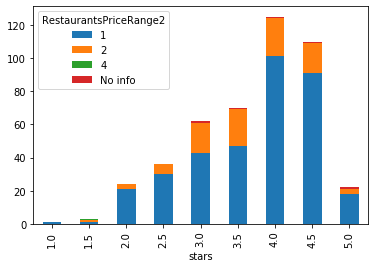

In [87]:
ice.groupby(['stars','RestaurantsPriceRange2']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [115]:
nowifi=[i for i in range(453) if list(ice['WiFi'])[i]=="'no'"]+[i for i in range(453) if list(ice['WiFi'])[i]=="u'no'"]
freewifi=[i for i in range(453) if list(ice['WiFi'])[i]=="'free'"]+[i for i in range(453) if list(ice['WiFi'])[i]=="u'free'"]
paidwifi=[i for i in range(453) if list(ice['WiFi'])[i]=="'paid'"]+[i for i in range(453) if list(ice['WiFi'])[i]=="u'paid'"]

[104, 101, 302]

In [116]:
for i in range(453):
    if i in nowifi:
        v[i]='No wifi'
    if i in freewifi:
        v[i]='Free wifi'
    if i in paidwifi:
        v[i]="Paid wifi"
ice['WiFi']=v

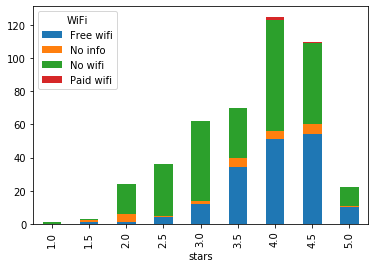

In [118]:
ice.groupby(['stars','WiFi']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

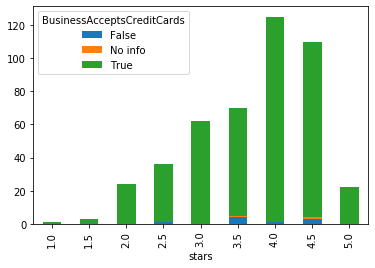

In [120]:
ice.groupby(['stars','BusinessAcceptsCreditCards']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [121]:
bp=ice['BusinessParking'].to_list()
nobp=[i for i in range(453) if bp[i] == 'No info'] +[i for i in range(453) if bp[i] == 'None'] 

In [125]:
import ast
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('garage',"")
ice['garage']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('street',"")
ice['street']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('validated',"")
ice['validated']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('lot',"")
ice['lot']=v
for i in range(453):
    if i in nobp:
        v[i]='No info'
    else:
        v[i]=ast.literal_eval(bp[i]).get('valet',"")
ice['valet']=v

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,HasTV,DietaryRestrictions,BikeParking,RestaurantsTakeOut,BYOBCorkage,garage,street,validated,lot,valet
411,7800 Fairview Rd,"{'WiFi': ''no'', 'BusinessAcceptsCreditCards':...",nwxF9EKLOCpkScMF2utHDw,"Ice Cream & Frozen Yogurt, Food, Event Plannin...",Charlotte,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1,35.147358,-80.809568,Ben & Jerry's,...,No info,No info,True,True,No info,False,False,False,True,False
460,115 Meyran Ave,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",O-fYUqXjkwNvRfFnlUH6Iw,"Bakeries, Event Planning & Services, Caterers,...",Pittsburgh,"{'Monday': '9:0-3:0', 'Tuesday': '9:0-3:0', 'W...",1,40.440959,-79.958608,Insomnia Cookies,...,No info,No info,True,True,No info,False,False,False,False,False
1807,2362 Professor Ave,"{'BusinessParking': '{'garage': False, 'street...",GhOWffUr9yDBxB5Ceqzc_Q,"Food, Ice Cream & Frozen Yogurt",Cleveland,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,41.480032,-81.685488,Tremont Scoops,...,No info,No info,True,True,No info,False,True,False,False,False
1897,10965 Lavender Hill Dr,"{'BikeParking': 'True', 'WiFi': 'u'no'', 'Busi...",I8T4Xsp3Wv7W-RJhsHrTDA,"Ice Cream & Frozen Yogurt, Food",Las Vegas,"{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",1,36.144869,-115.333094,Menchie's Frozen Yogurt,...,No info,No info,True,True,No info,False,False,False,True,False
1969,4845 S Fort Apache Rd,"{'BusinessAcceptsCreditCards': 'True', 'Alcoho...",iX2c4IzH_L5F6FM5GD3SUQ,"Restaurants, Desserts, Food, Juice Bars & Smoo...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,36.101690,-115.298150,Tasty Crepes,...,True,No info,True,True,No info,False,False,False,True,False


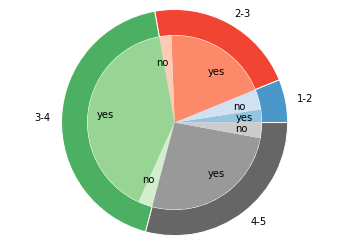

In [150]:
group_names=['1-2', '2-3', '3-4','4-5']
group_size=[28,98,195,132]
subgroup_names=['yes','no','yes','no','yes','no','yes','no']
subgroup_size=[11,17,88,10,183,12,119,13]
a, b, c,d=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.binary]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.2), b(0.4), b(0.2), c(0.4), c(0.2),d(0.4), d(0.2)])
plt.margins(0,0)
 
# show it
plt.show()


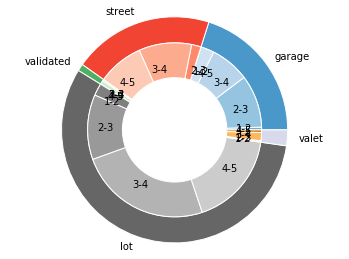

In [135]:
group_names=['garage', 'street', 'validated','lot','valet']
group_size=[80,80,4,225,9]
subgroup_names=['1-2', '2-3', '3-4', '4-5', '1-2', '2-3', '3-4', '4-5','1-2','2-3','3-4','4-5','1-2','2-3','3-4','4-5','1-2','2-3','3-4','4-5']
subgroup_size=[2,39,29,10,0,7,39,34,0,0,1,3,9,48,98,70,0,1,6,2]
a, b, c,d,e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.binary,plt.cm.PuOr]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6),d(0.6),e(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3),a(0.2), b(0.5), b(0.4),b(0.3),b(0.2), c(0.5), c(0.4), c(0.3), c(0.2),d(0.5), d(0.4), d(0.3), d(0.2),e(0.5), e(0.4), e(0.3), e(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()



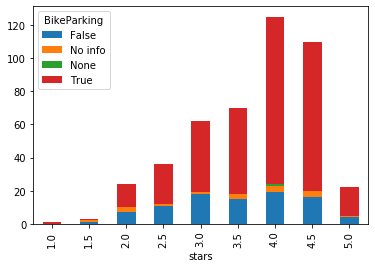

In [143]:
ice.groupby(['stars','BikeParking']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

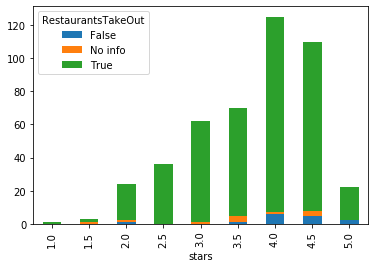

In [145]:
ice.groupby(['stars','RestaurantsTakeOut']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

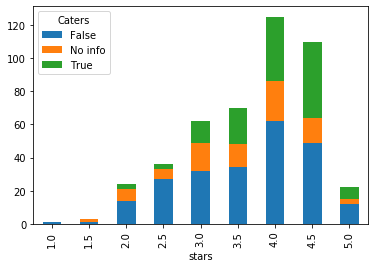

In [147]:
ice.groupby(['stars','Caters']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

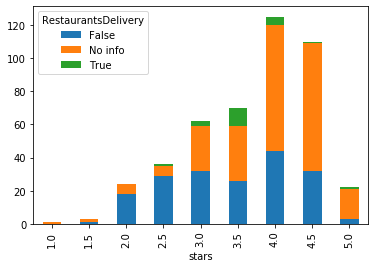

In [149]:
ice.groupby(['stars','RestaurantsDelivery']).size().unstack().plot(kind='bar',stacked=True)
plt.show()